In [2]:
import numpy as np
from numpy import random
import math
import time
import matplotlib.pylab as plt
import networkx as nx

# **Preparation of Algorithms**

### _**Define Priority Queue classes for both implementations**_

In [3]:
# PriorityQueueArray Class: implement priority queue using an array
class PriorityQueueArray:
    def __init__(self):
        self.queue = []
    
    def isEmpty(self):
        return len(self.queue) == 0
    
    def insert(self, node): # node = (prority, vertex)
        self.queue.append(node)
        self.queue.sort(key=lambda x: x[0], reverse=True)
    
    def pop(self):
        return self.queue.pop()
    
    def remove(self, vertex):
        for i in range(len(self.queue)):
            if self.queue[i][1] == vertex:
                self.queue.pop(i)
                break
    
    def __str__(self):
        return str(self.queue)

### We can code our own minimising heap but also python has a heapq module already lmao up to y'all ###
from heapq import heapify, heappush, heappop

### _**Define Graph classes for both implementations**_

In [4]:
# Graph Class: represents a graph using adjancency matrix/adjacency list
class Graph:
    def __init__(self, size):
        self.V = size
        self.E = 0
    
    def __str__(self):
        return f"Graph with {self.V} vertices and {self.E} edges"
    
# AdjMatrix Class: represents a graph using an adjacency matrix
class AdjMatrix(Graph):
    def __init__(self, size):
        super().__init__(size)
        self.graph = [[-1] * size for _ in range(size)]
    
    def add_edge(self, v1, v2, weight):
        assert v1 != v2, \
            "cannot add edge between the same vertex"
        assert 0 <= v1 < self.V, \
            "v1 is out of bounds"
        assert 0 <= v2 < self.V, \
            "v2 is out of bounds"
        assert 0 <= weight, \
            "weight must be non-negative"

        self.graph[v1][v2] = weight
        self.E += 1
    
    # (a) Dijkstra's Algorithm using Adjancency Matrix and Priority Queue using Array
    def dijkstra(self, start):
        # Initialise all starting values
        distance = [math.inf for _ in range(self.V)]
        pi = [-1 for _ in range(self.V)]
        visited = [0 for _ in range(self.V)]

        distance[start] = 0

        # Create a priority queue and insert all vertices
        pq = PriorityQueueArray()
        for i in range(self.V):
            pq.insert((distance[i], i))
        
        # Actual Dijkstra's Algorithm
        while not pq.isEmpty():
            _, u = pq.pop()
            visited[u] = 1

            for v, w in enumerate(self.graph[u]):
                if visited[v] == 0 and w != -1 and distance[u] + w < distance[v]:
                    pq.remove(v)
                    distance[v] = distance[u] + w
                    pi[v] = u
                    pq.insert((distance[v], v))

        return distance

# AdjList Class: represents a graph using an adjacency list
class AdjList(Graph):
    def __init__(self, size):
        super().__init__(size)
        self.graph = [[] for _ in range(size)]
    
    def add_edge(self, v1, v2, weight):
        assert v1 != v2, \
            "cannot add edge between the same vertex"
        assert 0 <= v1 < self.V, \
            "v1 is out of bounds"
        assert 0 <= v2 < self.V, \
            "v2 is out of bounds"
        assert 0 <= weight, \
            "weight must be non-negative"
        
        self.graph[v1].append((v2, weight))
        self.E += 1
    
    # (b) Dijkstra's Algorithm using Adjancency List and Priority Queue using Minimising Heap
    def dijkstra(self, start):
        # Initialise all starting values
        distance = [math.inf for _ in range(self.V)]
        pi = [-1 for _ in range(self.V)]
        visited = [0 for _ in range(self.V)]

        distance[start] = 0

        # Create a priority queue and insert all vertices
        pq = []
        for i in range(self.V):
            heappush(pq, (distance[i], i))
        
        # Actual Dijkstra's Algorithm
        while pq:
            _, u = heappop(pq)
            visited[u] = 1

            for v, w in self.graph[u]:
                if visited[v] == 0 and distance[u] + w < distance[v]:
                    distance[v] = distance[u] + w
                    pi[v] = u
                    heappush(pq, (distance[v], v))

        return distance

### _**Function: Generate Random Graph**_

In [5]:
def generateGraph(v, e):
    # print(f"Generating graph with {v} vertices and {e} edges")
    assert e >= v - 1, "Number of edges must be at least v-1 to ensure connectivity"
    assert e <= v * (v - 1), "Number of edges must be at most v*(v-1)"

    adj_matrix = AdjMatrix(v)
    adj_list = AdjList(v)

    edges = set()
    edge_pairs = set()

    # Create a minimum spanning tree (MST) to ensure all nodes are connected
    for i in range(v - 1):
        v1 = i
        v2 = i + 1
        weight = random.randint(1, 10)
        edges.add((v1, v2, weight))
        edge_pairs.add((v1, v2))

    # Generate all possible edges excluding self-loops
    possible_edges = [(i, j) for i in range(v) for j in range(v) if i != j]

    # Shuffle the possible edges to ensure randomness
    random.shuffle(possible_edges)

    # Add remaining edges randomly
    while len(edges) < e:
        v1, v2 = possible_edges.pop()
        if (v1, v2) not in edge_pairs:
            weight = random.randint(1, 10)
            edges.add((v1, v2, weight))
            edge_pairs.add((v1, v2))

    for v1, v2, weight in edges:
        adj_matrix.add_edge(v1, v2, weight)
        adj_list.add_edge(v1, v2, weight)
    
    return adj_matrix, adj_list

"""This is the graph from the tutorial (vertexes all minus 1), easier for me to see whether the algo is working correctly"""
# g = AdjList(5)

# g.add_edge(0, 1, 4)
# g.add_edge(0, 2, 2)
# g.add_edge(0, 3, 6)
# g.add_edge(0, 4, 8)
# g.add_edge(2, 3, 1)
# g.add_edge(3, 1, 1)
# g.add_edge(3, 4, 3)

# # Dijkstra's algorithm from D to all vertices
# print("Dijkstra's Algorithm starting from vertex 0:")
# print(g.dijkstra(0))

'This is the graph from the tutorial (vertexes all minus 1), easier for me to see whether the algo is working correctly'

### _**Function: Visualise Graph**_

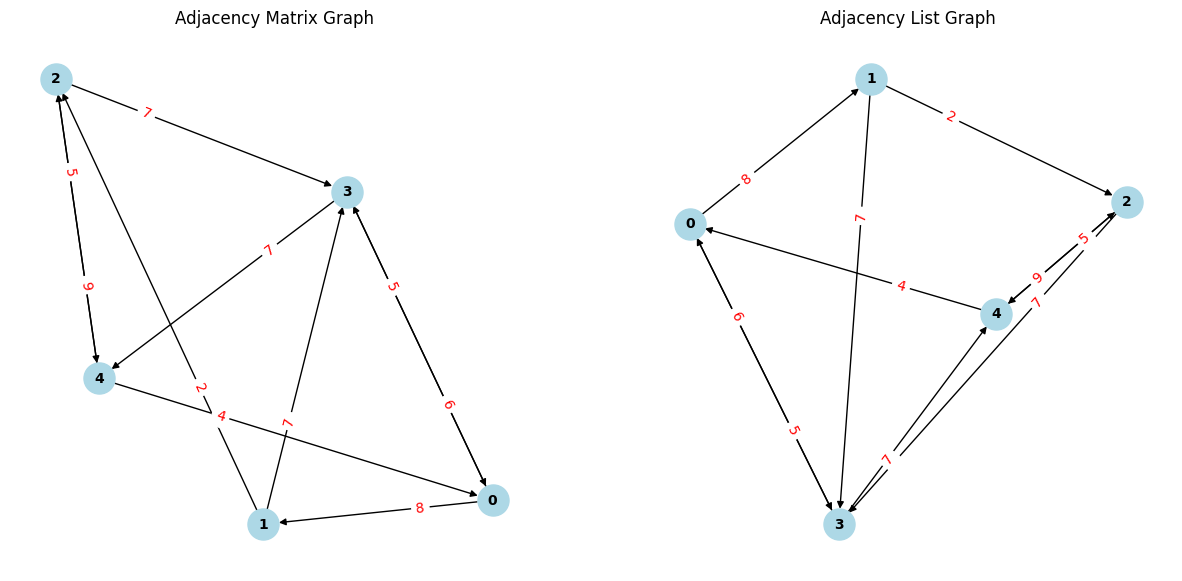

In [8]:
def visualize_graphs_side_by_side(adj_matrix, adj_list):
    fig, axes = plt.subplots(1, 2, figsize=(15, 7))

    def draw_graph(graph, ax, title):
        G = nx.DiGraph()
        if isinstance(graph, AdjMatrix):
            for i in range(graph.V):
                for j in range(graph.V):
                    if graph.graph[i][j] != -1:
                        G.add_edge(i, j, weight=graph.graph[i][j])
        elif isinstance(graph, AdjList):
            for i in range(graph.V):
                for (j, weight) in graph.graph[i]:
                    G.add_edge(i, j, weight=weight)
        else:
            raise TypeError("Unsupported graph type")

        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold', arrows=True, ax=ax)
        edge_labels = nx.get_edge_attributes(G, 'weight')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, ax=ax, font_color='red', label_pos=0.3)  # Adjust label_pos for better spacing
        ax.set_title(title)

    draw_graph(adj_matrix, axes[0], "Adjacency Matrix Graph")
    draw_graph(adj_list, axes[1], "Adjacency List Graph")

    plt.show()

# Example usage:
adj_matrix, adj_list = generateGraph(5, 10)
visualize_graphs_side_by_side(adj_matrix, adj_list)

### _**Function: Time Taken**_

In [9]:
def time_taken(start, graph):
    """
    Calculates time taken by dijkstra algorithm
    """

    start_time = time.time()
    distance = graph.dijkstra(start)
    total_time = time.time() - start_time

    return total_time, distance

Due to fluctuations caused by randomness of dataset, we should conduct multiple tests and obtain the average.

In [10]:
def average_time_vertices(iterations, Vrange, E):
    """
    Calculates average time taken by dijkstra algorithm for a range of vertices
    """

    time_taken_matrix = []
    time_taken_list = []

    for v in Vrange:
        total_time_matrix = 0
        total_time_list = 0

        for _ in range(iterations):
            adj_matrix, adj_list = generateGraph(v, E)
            start = random.randint(0, v)

            time_matrix, _ = time_taken(start, adj_matrix)
            time_list, _ = time_taken(start, adj_list)

            total_time_matrix += time_matrix
            total_time_list += time_list

        time_taken_matrix.append(total_time_matrix / iterations)
        time_taken_list.append(total_time_list / iterations)

    return time_taken_matrix, time_taken_list

def average_time_edges(iterations, V, Erange):
    """
    Calculates average time taken by dijkstra algorithm for a range of edges
    """
    
    time_taken_matrix = []
    time_taken_list = []

    for e in Erange:
        total_time_matrix = 0
        total_time_list = 0

        for _ in range(iterations):
            adj_matrix, adj_list = generateGraph(V, e)
            start = random.randint(0, V)

            time_matrix, _ = time_taken(start, adj_matrix)
            time_list, _ = time_taken(start, adj_list)

            total_time_matrix += time_matrix
            total_time_list += time_list

        time_taken_matrix.append(total_time_matrix / iterations)
        time_taken_list.append(total_time_list / iterations)

    return time_taken_matrix, time_taken_list

def average_time_sparse(iterations, Vrange):
    """
    Calculates average time taken by dijkstra algorithm for a range of sparse graphs
    """

    time_taken_matrix = []
    time_taken_list = []

    for v in Vrange:
        total_time_matrix = 0
        total_time_list = 0

        for _ in range(iterations):
            adj_matrix, adj_list = generateGraph(v, v - 1)
            start = random.randint(0, v)

            time_matrix, _ = time_taken(start, adj_matrix)
            time_list, _ = time_taken(start, adj_list)

            total_time_matrix += time_matrix
            total_time_list += time_list

        time_taken_matrix.append(total_time_matrix / iterations)
        time_taken_list.append(total_time_list / iterations)

    return time_taken_matrix, time_taken_list

def average_time_dense(iterations, Vrange):
    """
    Calculates average time taken by dijkstra algorithm for a range of dense graphs
    """

    time_taken_matrix = []
    time_taken_list = []

    for v in Vrange:
        total_time_matrix = 0
        total_time_list = 0

        for _ in range(iterations):
            adj_matrix, adj_list = generateGraph(v, v * (v - 1))
            start = random.randint(0, v)

            time_matrix, _ = time_taken(start, adj_matrix)
            time_list, _ = time_taken(start, adj_list)

            total_time_matrix += time_matrix
            total_time_list += time_list

        time_taken_matrix.append(total_time_matrix / iterations)
        time_taken_list.append(total_time_list / iterations)

    return time_taken_matrix, time_taken_list

---

# **Empirical Time Complexity Analysis for both Implementations**

V done
E done


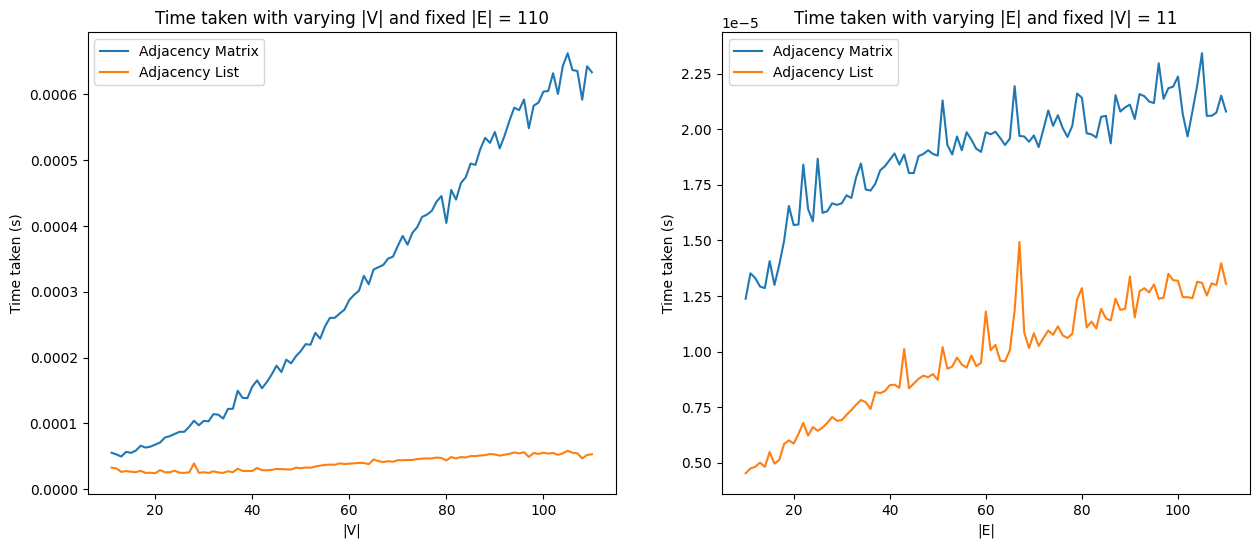

In [ ]:
"""
    Plot change in time taken with (varying |V| + fixed |E|) and (varying |E| + fixed |V|)

    To ensure that the graph is connected, the minimum number of edges required is v - 1
    The maximum number of edges possible is v * (v - 1)

    -  |V| ranges from 11 to 110, fixed |E| = 110
    -  |E| ranges from 10 to 110, fixed |V| = 11
"""

Vrange = list(range(11, 111))
Erange = list(range(10, 111))
iterations = 10

time_taken_matrix_V, time_taken_list_V = average_time_vertices(iterations, Vrange, 110)
print("V done")
time_taken_matrix_E, time_taken_list_E = average_time_edges(iterations, Erange, 11)
print("E done")

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].plot(Vrange, time_taken_matrix_V, label="Adjacency Matrix")
axes[0].plot(Vrange, time_taken_list_V, label="Adjacency List")
axes[0].set_title("Time taken with varying |V| and fixed |E| = 110")
axes[0].set_xlabel("|V|")
axes[0].set_ylabel("Time taken (s)")
axes[0].legend()

axes[1].plot(Erange, time_taken_matrix_E, label="Adjacency Matrix")
axes[1].plot(Erange, time_taken_list_E, label="Adjacency List")
axes[1].set_title("Time taken with varying |E| and fixed |V| = 11")
axes[1].set_xlabel("|E|")
axes[1].set_ylabel("Time taken (s)")
axes[1].legend()

## **Comparing Sparse vs Dense Graph**
Plot performance of matrix implementation and list implementation in the scenario of a sparse graph and a dense graph

Sparse done
Dense done


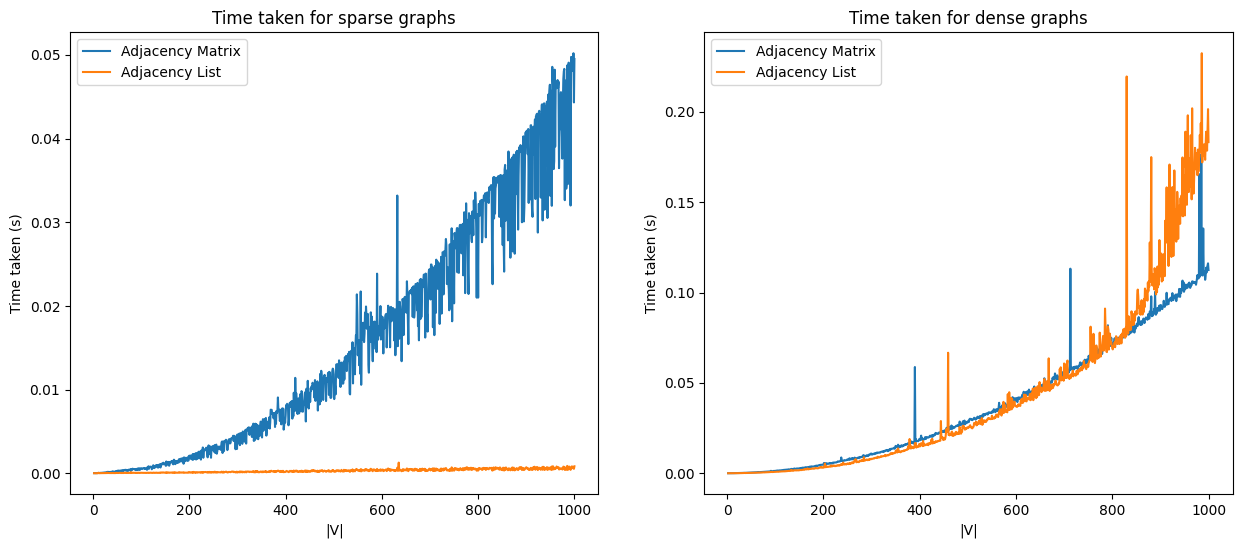

In [ ]:
"""
    Using the same conditions for a sparse graph and a dense graph, compare the performances of both implementations of Dijkstra's algorithm
    - Sparse graph: |V| = [2, 1000] and |E| = |V| - 1
    - Dense graph: |V| = [2, 1000] and |E| = |V| * (|V| - 1)
"""

## this takes 13 min to run bcas of the dense graph

Vrange = list(range(2, 1001))
iterations = 1

time_taken_matrix_sparse, time_taken_list_sparse = average_time_sparse(iterations, Vrange)
print("Sparse done")
time_taken_matrix_dense, time_taken_list_dense = average_time_dense(iterations, Vrange)
print("Dense done")

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].plot(Vrange, time_taken_matrix_sparse, label="Adjacency Matrix")
axes[0].plot(Vrange, time_taken_list_sparse, label="Adjacency List")
axes[0].set_title("Time taken for sparse graphs")
axes[0].set_xlabel("|V|")
axes[0].set_ylabel("Time taken (s)")
axes[0].legend()

axes[1].plot(Vrange, time_taken_matrix_dense, label="Adjacency Matrix")
axes[1].plot(Vrange, time_taken_list_dense, label="Adjacency List")
axes[1].set_title("Time taken for dense graphs")
axes[1].set_xlabel("|V|")
axes[1].set_ylabel("Time taken (s)")
axes[1].legend()

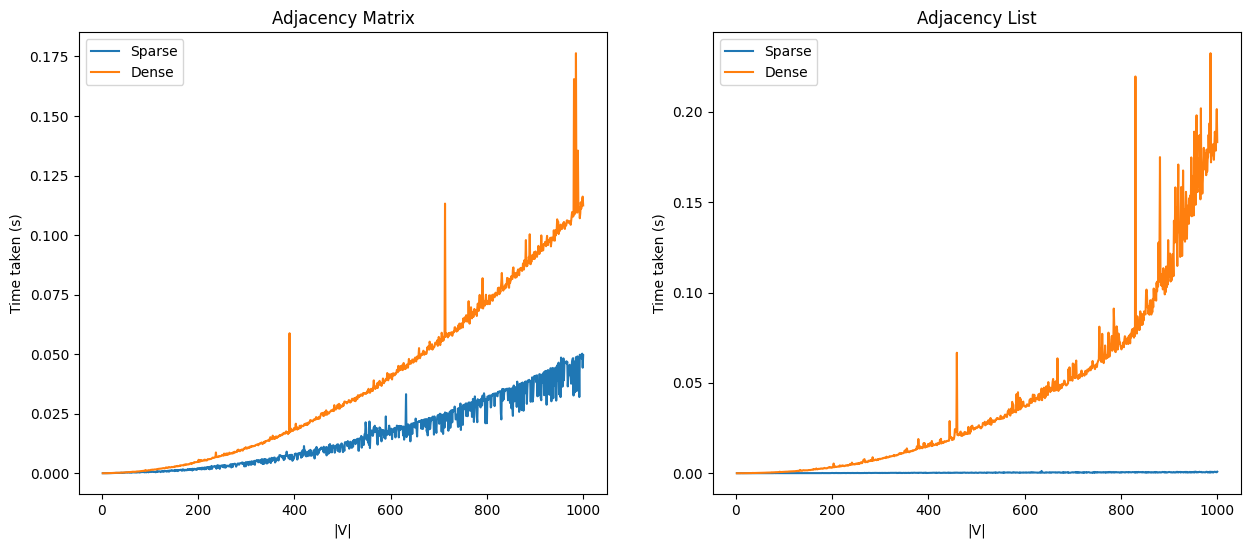

In [23]:
"""
    Plot a comparison of sparse vs dense performance for both implementations of Dijkstra's algorithm
"""

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].plot(Vrange, time_taken_matrix_sparse, label="Sparse")
axes[0].plot(Vrange, time_taken_matrix_dense, label="Dense")
axes[0].set_title("Adjacency Matrix")
axes[0].set_xlabel("|V|")
axes[0].set_ylabel("Time taken (s)")
axes[0].legend()

axes[1].plot(Vrange, time_taken_list_sparse, label="Sparse")
axes[1].plot(Vrange, time_taken_list_dense, label="Dense")
axes[1].set_title("Adjacency List")
axes[1].set_xlabel("|V|")
axes[1].set_ylabel("Time taken (s)")
axes[1].legend()